In [2045]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from apyori import apriori as apr
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder as TE
from sklearn.cluster import KMeans
from sklearn import metrics
from pyclustering.cluster.kmeans import kmeans, kmeans_visualizer
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer
from pyclustering.samples.definitions import FCPS_SAMPLES
from pyclustering.utils import read_sample
import random
from sklearn.metrics import davies_bouldin_score

In [1988]:
# Question 1

print('Support = Frequency(X+Y)/N')
print('Confidence = Frequency(X+Y)/Frequency(X)')
print('Lift = Confidence/Support')
print()
print('For the rule {B, D} --> {A, C, E}:')
print('             Frequency of {B, D} = 1')
print('             Frequency of {A, C, E} = 1')
print('             Frequency of {A, B, C, D, E} = 1')
print()
print('Confidence = 1/1')
print('Lift = Confidence/Support = 1/1 = 1')

Support = Frequency(X+Y)/N
Confidence = Frequency(X+Y)/Frequency(X)
Lift = Confidence/Support

For the rule {B, D} --> {A, C, E}:
             Frequency of {B, D} = 1
             Frequency of {A, C, E} = 1
             Frequency of {A, B, C, D, E} = 1

Confidence = 1/1
Lift = Confidence/Support = 1/1 = 1


In [2000]:
# Question 2

print('Support = Frequency(X+Y)/N')
print('Confidence = Frequency(X+Y)/Frequency(X)')
print('Lift = Confidence/Support')
print()
print('For the rule {Cheese, Wings} --> {Soda}:')
print('             Frequency of {Cheese, Wings} = 3')
print('             Frequency of {Soda} = 3')
print('             Frequency of {Cheese, Wings, Soda} = 2')
print()
print('Support = 2/6 ')
print('Confidence = 2/3')
print('Lift = Confidence/Support = 2/6 / 2/3 = 0.5')

Support = Frequency(X+Y)/N
Confidence = Frequency(X+Y)/Frequency(X)
Lift = Confidence/Support

For the rule {Cheese, Wings} --> {Soda}:
             Frequency of {Cheese, Wings} = 3
             Frequency of {Soda} = 3
             Frequency of {Cheese, Wings, Soda} = 2

Support = 2/6 
Confidence = 2/3
Lift = Confidence/Support = 2/6 / 2/3 = 0.5


In [2003]:
# Question 3

print('There are 3 clusters (A, B, C)')
print('Silhouette value is given by: s(i) = b(i) – a(i)/max{a(i), b(i)}')
print('Where b(i) = inter cluster distance = large in this case')
print('And a(i) = intra cluster distance = very small in this case')
print('The S(i) will be close to 1, as the objects are well matched to their own cluster.')
print()
print('Final Answer: Option (C) = 1')

There are 3 clusters (A, B, C)
Silhouette value is given by: s(i) = b(i) – a(i)/max{a(i), b(i)}
Where b(i) = inter cluster distance = large in this case
And a(i) = intra cluster distance = very small in this case
The S(i) will be close to 1, as the objects are well matched to their own cluster.

Final Answer: Option (C) = 1


In [2130]:
# Question 4

print('[Part 4a]')
print('Silhouette value is given by: s(i) = b(i) – a(i)/max{a(i), b(i)}')
c0 = [-2, -1, 1, 2, 3]
c1 = [4, 5, 7, 8]

ai = 0
bi = 0

c0_n = [-2, 1, 2, 3]

d = []
for i in range(len(c0_n)):
    d.append(abs(-1-c0_n[i]))
ai = np.mean(d)

d = []
for i in range(len(c1)):
    d.append(abs(-1-c1[i]))
bi = np.mean(d)
print(f'Sillouette Width of -1 in cluster 0 is: {(bi-ai)/bi}')
print()

print('[Part 4b]')
print('The Davies-Bouldin Index is: (d_i + d_j)/d_ij, where:\nd_i: average distance between data points in cluster i to centroid \nd_j: average distance between data points in cluster j to centroid \nd_ij: distance between centroids of clusters i and j')
print()

center_c0 = np.mean(c0)
center_c1 = np.mean(c1)

di = []
for i in range(len(c0)):
    di.append(abs(center_c0 - c0[i]))
di = np.mean(di)
print('Cluster-wise Davies-Bouldin value of cluster 0: ', di)

dj = []
for i in range(len(c1)):
    dj.append(abs(center_c1 - c1[i]))
dj = np.mean(dj)

dij = abs(center_c0-center_c1)
print('Cluster-wise Davies-Bouldin value of cluster 1: ', dj)
print()

print('[Part 4c]')
davies_bouldin_index = (di+dj)/dij
print('For given clusters, Davies-Bouldin Index is: ', davies_bouldin_index)

[Part 4a]
Silhouette value is given by: s(i) = b(i) – a(i)/max{a(i), b(i)}
Sillouette Width of -1 in cluster 0 is: 0.6428571428571429

[Part 4b]
The Davies-Bouldin Index is: (d_i + d_j)/d_ij, where:
d_i: average distance between data points in cluster i to centroid 
d_j: average distance between data points in cluster j to centroid 
d_ij: distance between centroids of clusters i and j

Cluster-wise Davies-Bouldin value of cluster 0:  1.6800000000000002
Cluster-wise Davies-Bouldin value of cluster 1:  1.5

[Part 4c]
For given clusters, Davies-Bouldin Index is:  0.5888888888888889


[Part 5a]
Number of itemsets: 524
Largest k: 4
---------------------------------------
[Part 5b]
Association Rules: 1228
---------------------------------------
[Part 5c]


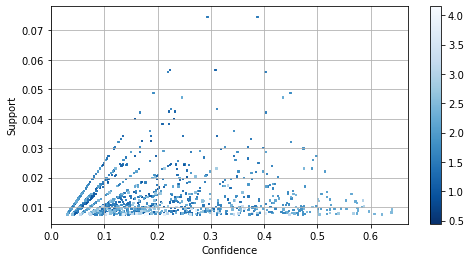

---------------------------------------
[Part d]


,Antecedents,Consequents,Support,Confidence,Lift
0,"(16, 124)",(166),0.008236,0.637795,2.496107
1,"(16, 167)",(166),0.009354,0.638889,2.500387
2,"(124, 103, 167)",(166),0.007829,0.606299,2.372842
3,"(103, 158, 167)",(166),0.007626,0.619835,2.425816


In [2131]:
# Question 5

df = pd.read_csv('Groceries.csv')

numSort = []
for k in df['Customer']:
    numSort.append(k)

num = []
for k in numSort:
    if k not in num:
        num.append(k)

del(num[len(num)-1])

d = {}
j = 0
index = 0
r = [1, 2, 3, 4, 5, 6, 7, 8, 9,10, 11, 12, 13, 14, 15, 16]
for i in num:
    x = []
    while i == df['Customer'][j]:
        x.append(df['Item'][index])
        index = index + 1
        j = j+1
    d[i] = x
d[9835] = ['chicken', 'other vegetables', 'shopping bags', 'tropical fruit', 'vinegar']

records = []
for i in d:
    records.append(d[i])

te = TE()
te_ary = te.fit(records).transform(records)
df2 = pd.DataFrame(te_ary, columns=te.columns_)

d2 = {}
colnum = 1
for i in df2.columns:
    d2[colnum] = i
    colnum += 1
    
min_transactions = 75
minimum_support = (min_transactions/len(d))

frq_sets = apriori(df2, min_support = minimum_support)
print('[Part 5a]')
print(f'Number of itemsets: {len(frq_sets)}')
print('Largest k:', len(frq_sets['itemsets'][len(frq_sets)-1]))
print('---------------------------------------')

print('[Part 5b]')
assc_rules = association_rules(frq_sets, metric='confidence', min_threshold = 0.01)
print(f'Association Rules: {len(assc_rules)}')
print('---------------------------------------')

print('[Part 5c]')
plt.figure(figsize=(8,4))
plt.scatter(assc_rules['confidence'], assc_rules['support'], marker = 's', s = assc_rules['lift'], c = assc_rules['lift'], cmap='Blues_r')
plt.grid(True)
plt.xlabel("Confidence")
plt.ylabel("Support")
cbar = plt.colorbar()
plt.show()
print('---------------------------------------')

A = []
C = []
S = []
Co = []
L = []

count = 0
for i in assc_rules['confidence']:
    if i >= 0.6:
        A.append(assc_rules['antecedents'][count])
        C.append(assc_rules['consequents'][count])
        S.append(assc_rules['support'][count])
        Co.append(assc_rules['confidence'][count])
        L.append(assc_rules['lift'][count])
    count = count + 1

assc_rules_60 = pd.DataFrame()
assc_rules_60['Antecedents'] = A
assc_rules_60['Consequents'] = C
assc_rules_60['Support'] = S
assc_rules_60['Confidence'] = Co
assc_rules_60['Lift'] = L

print('[Part d]')
assc_rules_60

[Part 6a]


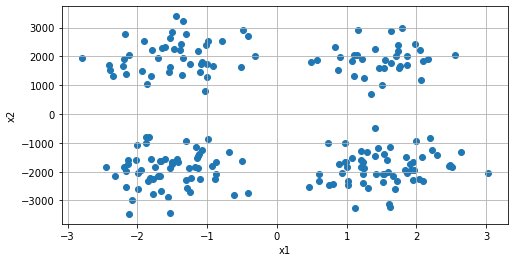

Based on the above plot, I think there are 4 clusters


In [1936]:
# Question 6 (a)

df = pd.read_csv('TwoFeatures.csv')
r0 = []
r = []
x1_0 = []
x2_0 = []
x1_1 = []
x2_1 = []

for i in range(0,len(df)):
    r0.append([df['x1'][i], (df['x2'][i])])
    x1_0.append(df['x1'][i])
    x2_0.append((df['x2'][i]))
    
for i in range(0,len(df)):
    r.append([df['x1'][i], (df['x2'][i])/1000])


plt.figure(figsize=(8,4))
plt.scatter(x1_0,x2_0)
plt.grid(True)
plt.xlabel("x1")
plt.ylabel("x2")
print('[Part 6a]')
plt.show()
print('Based on the above plot, I think there are 4 clusters')

Part[6b]
[Please run this again in case it gives an error]


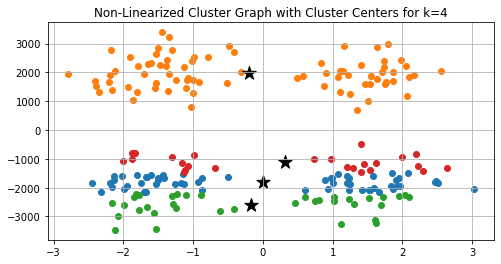

,0,1,2,3,4,5,6,7
Elbow Values,1.000000,2.000000,3.00000,4.000000,5.000000,6.000000,7.00000,8.00000
TWCSS,376.769398,1919.141399,1730.69767,1780.750228,2008.369306,1776.577247,1799.19528,2133.98296


In [1965]:
# Question 6 (b)

print('Part[6b]')
print('[Please run this again in case it gives an error]')

def Manhattan(v1,v2):
    if(len(v1)!=len(v2)):
        print ('error')
        return -1
    return sum([abs(v1[i]-v2[i]) for i in range(len(v1))])

    # kmeans with Manhattan distance. 
    # rows refers to the NxM feature vectors
def kcluster(rows,k, distance=Manhattan):# Cited from Programming Collective Intelligence 
        # Determine the minimum and maximum values for each point
        ranges=[(min([row[i] for row in rows]),max([row[i] for row in rows])) for i in range(len(rows[0]))]

        # Create k randomly placed centroids
        clusters=[[random.random( )*(ranges[i][1]-ranges[i][0])+ranges[i][0] for i in range(len(rows[0]))] for j in range(k)]

        lastmatches=None
        for t in range(100):
#             print ('Iteration %d' % t)
            bestmatches=[[] for i in range(k)]
            # Find which centroid is the closest for each row
            for j in range(len(rows)):
                row=rows[j]
                bestmatch=0
                for i in range(k):
                    d=distance(clusters[i],row)
                    if d<distance(clusters[bestmatch],row): 
                        bestmatch=i
                bestmatches[bestmatch].append(j)
            ## If the results are the same as last time, this is complete
            if bestmatches==lastmatches:
                break
            lastmatches=bestmatches

            # Move the centroids to the average of their members
            for i in range(k):
                avgs=[0.0]*len(rows[0])
                if len(bestmatches[i])>0:
                    for rowid in bestmatches[i]:
                        for m in range(len(rows[rowid])):
                            avgs[m]+=rows[rowid][m]
                    for j in range(len(avgs)):
                        avgs[j]/=len(bestmatches[i])
                    clusters[i]=avgs
        return bestmatches, clusters

def WCSS_Manhattan(rows, k):
    # l is the list of clusters
    # rows is the list of coordinates
    l = kcluster(rows, k)
    d = {}
    v = 0
    for i in range(len(rows)):
        d[i] = rows[v]
        v=v+1
    dst = []
    mean_subc = []
    mean_c = 0
    for i in range(0, len(l[0])):
        for j in l[0][i]:
            dst.append(abs(d[j][0]-l[1][i][0]) + abs(d[j][0]-l[1][i][1]))
        mean_subc.append(np.mean(dst))
    mean_c = np.mean(mean_subc)
    return mean_c

kc = kcluster(r0,4)

dic = {}
j = 0
for i in range(len(r0)):
    dic[i] = r0[j]
    j=j+1

z1 = []
z1_0 = []
z1_1 = []
z2 = []
z2_0 = []
z2_1 = []
z3 = []
z3_0 = []
z3_1 = []
z4 = []
z4_0 = []
z4_1 = []

kc[0][0][0:len(kc[0][0])]
kc[0][1]

for i in kc[0][0]:
    z1.append(dic[i])
    
for i in range(len(z1)):
    z1_0.append(z1[i][0])
    z1_1.append(z1[i][1])
    
for i in kc[0][1]:
    z2.append(dic[i])
    
for i in range(len(z2)):
    z2_0.append(z2[i][0])
    z2_1.append(z2[i][1])
    
for i in kc[0][2]:
    z3.append(dic[i])

for i in range(len(z3)):
    z3_0.append(z3[i][0])
    z3_1.append(z3[i][1])
    
for i in kc[0][3]:
    z4.append(dic[i])

for i in range(len(z4)):
    z4_0.append(z4[i][0])
    z4_1.append(z4[i][1])

plt.figure(figsize=(8,4))
plt.scatter(z1_0, z1_1)
plt.scatter(kc[1][0][0], kc[1][0][1], marker='*', color='black', s=200)
plt.scatter(z2_0, z2_1)
plt.scatter(kc[1][1][0], kc[1][1][1], marker='*', color='black', s=200)
plt.scatter(z3_0, z3_1)
plt.scatter(kc[1][2][0], kc[1][2][1], marker='*', color='black', s=200)
plt.scatter(z4_0, z4_1)
plt.scatter(kc[1][3][0], kc[1][3][1], marker='*', color='black', s=200)
plt.grid(True)
plt.title('Non-Linearized Cluster Graph with Cluster Centers for k=4')
plt.show()

k_vals1 = []
sse1 = []
for i in range(1, 9):
    sse1.append(WCSS_Manhattan(r0, i))
    k_vals1.append(i)
    
data = [k_vals1, sse1]

gf1 = pd.DataFrame(data)
gf1.index = ['Elbow Values', 'TWCSS']
gf1

[Part 6c]
[If it gives an error, please run the previous part again without errors]


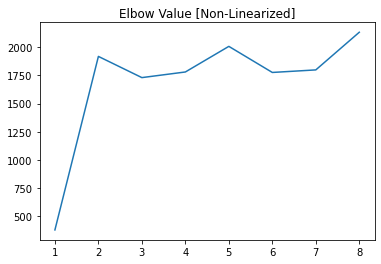

Based on the graph, I would likely choose k=2 as my Elbow Value


In [1976]:
# Question 6(c)

print('[Part 6c]')
print('[If it gives an error, please run the previous part again without errors]')
plt.plot(k_vals1,sse1)
plt.title('Elbow Value [Non-Linearized]')
plt.show()

print('Based on the graph, I would likely choose k=2 as my Elbow Value')

[Part 6d]
[Please run this again in case the clusters and centers are not displyed correctly, and it gives an error]


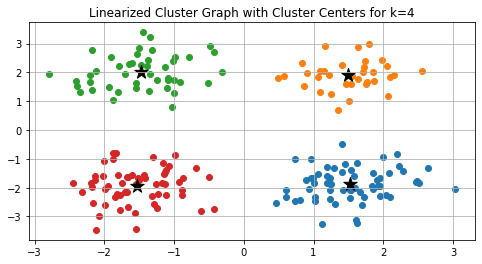

,0,1,2,3,4,5,6,7
Elbow Values,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000
TWCSS,3.330975,1.952744,1.230029,0.865714,0.783265,0.710249,0.673843,0.637945


In [1969]:
# Question 6(d)

print('[Part 6d]')
def kManhattan(x,k, no_of_iterations):
    idx = np.random.choice(len(x), k, replace=False)
    #Randomly choosing Centroids 
    centroids = x[idx, :] #Step 1
     
    #finding the distance between centroids and all the data points
    distances = cdist(x, centroids ,'cityblock') #Step 2
     
    #Centroid with the minimum Distance
    points = np.array([np.argmin(i) for i in distances]) #Step 3
     
    #Repeating the above steps for a defined number of iterations
    #Step 4
    for _ in range(no_of_iterations): 
        centroids = []
        for idx in range(k):
            #Updating Centroids by taking mean of Cluster it belongs to
            temp_cent = x[points==idx].mean(axis=0) 
            centroids.append(temp_cent)
 
        centroids = np.vstack(centroids) #Updated Centroids 
         
        distances = cdist(x, centroids ,'cityblock')
        points = np.array([np.argmin(i) for i in distances])
         
    return points, centroids

def WCSS_Manh(rows, k, iters):
    # rows is the list of coordinates
    # k is the number of clusters
    # iters is the number of iterations
    
    pca = PCA(2)
    s = pca.fit_transform(rows)
    l = kManhattan(s, k, iters)
    u_l = np.unique(l[0])
    mean_subc = []
    mean_c = 0
    for i in range(len(u_l)):
        cluster_size = len(s[l[0]==i,0])
        dist = []
        for j in range(cluster_size):
            dist.append(abs(s[l[0]==i,0][j] - l[1][i][0]) + abs(s[l[0]==i,1][j] - l[1][i][1]))
        mean_subc.append(np.mean(dist))
    mean_c = np.mean(mean_subc)
    return mean_c

kc = kcluster(r,4)

dic = {}
j = 0
for i in range(len(r)):
    dic[i] = r[j]
    j=j+1

z1 = []
z1_0 = []
z1_1 = []
z2 = []
z2_0 = []
z2_1 = []
z3 = []
z3_0 = []
z3_1 = []
z4 = []
z4_0 = []
z4_1 = []

kc[0][0][0:len(kc[0][0])]
kc[0][1]

for i in kc[0][0]:
    z1.append(dic[i])
    
for i in range(len(z1)):
    z1_0.append(z1[i][0])
    z1_1.append(z1[i][1])
    
for i in kc[0][1]:
    z2.append(dic[i])
    
for i in range(len(z2)):
    z2_0.append(z2[i][0])
    z2_1.append(z2[i][1])
    
for i in kc[0][2]:
    z3.append(dic[i])

for i in range(len(z3)):
    z3_0.append(z3[i][0])
    z3_1.append(z3[i][1])
    
for i in kc[0][3]:
    z4.append(dic[i])

for i in range(len(z4)):
    z4_0.append(z4[i][0])
    z4_1.append(z4[i][1])

plt.figure(figsize=(8,4))
plt.scatter(z1_0, z1_1)
plt.scatter(kc[1][0][0], kc[1][0][1], marker='*', color='black', s=200)
plt.scatter(z2_0, z2_1)
plt.scatter(kc[1][1][0], kc[1][1][1], marker='*', color='black', s=200)
plt.scatter(z3_0, z3_1)
plt.scatter(kc[1][2][0], kc[1][2][1], marker='*', color='black', s=200)
plt.scatter(z4_0, z4_1)
plt.scatter(kc[1][3][0], kc[1][3][1], marker='*', color='black', s=200)
plt.title('Linearized Cluster Graph with Cluster Centers for k=4')
plt.grid(True)
print('[Please run this again in case the clusters and centers are not displyed correctly, and it gives an error]')
plt.show()

k_vals = []
sse = []
for i in range(1, 9):
    sse.append(WCSS_Manh(r, i, 20))
    k_vals.append(i)

data = [k_vals, sse]

gf2 = pd.DataFrame(data)
gf2.index = ['Elbow Values', 'TWCSS']
gf2

[Part 6e]
[If it gives an error, please run the previous part again without errors]


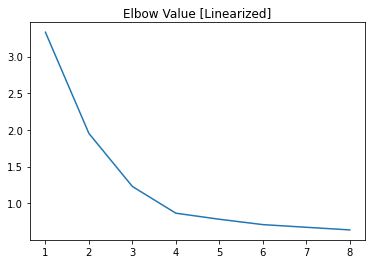

Based on the graph, I would likely choose k=4 as my Elbow Value


In [1977]:
# Question 6e

print('[Part 6e]')
print('[If it gives an error, please run the previous part again without errors]')
plt.plot(k_vals,sse)
plt.title('Elbow Value [Linearized]')
plt.show()
print('Based on the graph, I would likely choose k=4 as my Elbow Value')

In [1979]:
# Question 6f
print('[Part 6f]')
print()
print('Between my choices in part 6c and 6e, I would recommend k=4 as the number of clusters for this data because the first [6b] clustering graph was incorrect since the values were not linearized, and so the elbow chart [6c] also was wrong, while the second cluster graph [6d] was correct since the values were linearized and it also gave the correct chart for the elbow values [6e]') 

[Part 6f]

Between my choices in part 6c and 6e, I would recommend k=4 as the number of clusters for this data because the first [6b] clustering graph was incorrect since the values were not linearized, and so the elbow chart [6c] also was wrong, while the second cluster graph [6d] was correct since the values were linearized and it also gave the correct chart for the elbow values [6e]


In [702]:
# df = pd.read_csv('Groceries.csv')

# numSort = []
# for k in df['Customer']:
#     numSort.append(k)

# num = []
# for k in numSort:
#     if k not in num:
#         num.append(k)

# del(num[len(num)-1])

# d = {}
# j = 0
# index = 0
# r = [1, 2, 3, 4, 5, 6, 7, 8, 9,10, 11, 12, 13, 14, 15, 16]
# for i in num:
#     x = []
#     while i == df['Customer'][j]:
#         x.append(df['Item'][index])
#         index = index + 1
#         j = j+1
#     d[i] = x
# d[9835] = ['chicken', 'other vegetables', 'shopping bags', 'tropical fruit', 'vinegar']

# records = []
# for i in d:
#     records.append(d[i])

# te = TE()
# te_ary = te.fit(records).transform(records)
# df2 = pd.DataFrame(te_ary, columns=te.columns_)

# d2 = {}
# colnum = 1
# for i in df2.columns:
#     d2[colnum] = i
#     colnum += 1
    
# min_transactions = 75
# minimum_support = (min_transactions/len(d))

# frq_sets = apriori(df2, min_support = minimum_support)
# print('[Part a]')
# print(f'Number of itemsets: {len(frq_sets)}')
# print('Largest k:', len(frq_sets['itemsets'][len(frq_sets)-1]))
# print('---------------------------------------')

# print('[Part b]')
# assc_rules = association_rules(frq_sets, metric='confidence', min_threshold = 0.01)
# print(f'Association Rules: {len(assc_rules)}')
# print('---------------------------------------')

# print('[Part c]')
# plt.figure(figsize=(8,4))
# plt.scatter(assc_rules['confidence'], assc_rules['support'], marker = 's', s = assc_rules['lift'], c = assc_rules['lift'], cmap='Blues_r')
# plt.grid(True)
# plt.xlabel("Confidence")
# plt.ylabel("Support")
# cbar = plt.colorbar()
# plt.show()
# print('---------------------------------------')

# A = []
# C = []
# S = []
# Co = []
# L = []

# count = 0
# for i in assc_rules['confidence']:
#     if i >= 0.6:
#         A.append(assc_rules['antecedents'][count])
#         C.append(assc_rules['consequents'][count])
#         S.append(assc_rules['support'][count])
#         Co.append(assc_rules['confidence'][count])
#         L.append(assc_rules['lift'][count])
#     count = count + 1

# assc_rules_60 = pd.DataFrame()
# assc_rules_60['Antecedents'] = A
# assc_rules_60['Consequents'] = C
# assc_rules_60['Support'] = S
# assc_rules_60['Confidence'] = Co
# assc_rules_60['Lift'] = L

# print('[Part d]')
# assc_rules_60

In [1004]:
# def kcluster(rows,k, distance=Manhattan):# Cited from Programming Collective Intelligence 
#         # Determine the minimum and maximum values for each point
#         ranges=[(min([row[i] for row in rows]),max([row[i] for row in rows])) for i in range(len(rows[0]))]

#         # Create k randomly placed centroids
#         clusters=[[random.random( )*(ranges[i][1]-ranges[i][0])+ranges[i][0] for i in range(len(rows[0]))] for j in range(k)]

#         lastmatches=None
#         for t in range(100):
# #             print ('Iteration %d' % t)
#             bestmatches=[[] for i in range(k)]
#             # Find which centroid is the closest for each row
#             for j in range(len(rows)):
#                 row=rows[j]
#                 bestmatch=0
#                 for i in range(k):
#                     d=distance(clusters[i],row)
#                     if d<distance(clusters[bestmatch],row): 
#                         bestmatch=i
#                 bestmatches[bestmatch].append(j)
#             ## If the results are the same as last time, this is complete
#             if bestmatches==lastmatches:
#                 break
#             lastmatches=bestmatches

#             # Move the centroids to the average of their members
#             for i in range(k):
#                 avgs=[0.0]*len(rows[0])
#                 if len(bestmatches[i])>0:
#                     for rowid in bestmatches[i]:
#                         for m in range(len(rows[rowid])):
#                             avgs[m]+=rows[rowid][m]
#                     for j in range(len(avgs)):
#                         avgs[j]/=len(bestmatches[i])
#                     clusters[i]=avgs
#         return bestmatches, clusters

In [ ]:
# def WCSS_Manhattan(rows, l):
#     # l is the list of clusters
#     # rows is the list of coordinates
#     d = {}
#     v = 0
#     for i in range(len(rows)):
#         d[i] = rows[v]
#         v=v+1
#     dst = []
#     mean_subc = []
#     mean_c = 0
#     for i in range(0, len(l[0])):
#         for j in l[0][i]:
#             dst.append(abs(d[j][0]-l[1][i][0]) + abs(d[j][0]-l[1][i][1]))
#         mean_subc.append(np.mean(dst))
#     mean_c = np.mean(mean_subc)
#     return mean_c

In [1844]:
# def WCSS_Manh(rows, k, iters):
#     # rows is the list of coordinates
#     # k is the number of clusters
#     # iters is the number of iterations
    
#     pca = PCA(2)
#     s = pca.fit_transform(rows)
#     l = kManhattan(s, k, iters)
#     u_l = np.unique(l[0])
#     mean_subc = []
#     mean_c = 0
#     for i in range(len(u_l)):
#         cluster_size = len(s[l[0]==i,0])
#         dist = []
#         for j in range(cluster_size):
#             dist.append(abs(s[l[0]==i,0][j] - l[1][i][0]) + abs(s[l[0]==i,1][j] - l[1][i][1]))
#         mean_subc.append(np.mean(dist))
#     mean_c = np.mean(mean_subc)
#     return mean_c

In [1942]:
# kc = kcluster(r,4)

# dic = {}
# j = 0
# for i in range(len(r)):
#     dic[i] = r[j]
#     j=j+1

# z1 = []
# z1_0 = []
# z1_1 = []
# z2 = []
# z2_0 = []
# z2_1 = []
# z3 = []
# z3_0 = []
# z3_1 = []
# z4 = []
# z4_0 = []
# z4_1 = []

# kc[0][0][0:len(kc[0][0])]
# kc[0][1]

# for i in kc[0][0]:
#     z1.append(dic[i])
    
# for i in range(len(z1)):
#     z1_0.append(z1[i][0])
#     z1_1.append(z1[i][1])
    
# for i in kc[0][1]:
#     z2.append(dic[i])
    
# for i in range(len(z2)):
#     z2_0.append(z2[i][0])
#     z2_1.append(z2[i][1])
    
# for i in kc[0][2]:
#     z3.append(dic[i])

# for i in range(len(z3)):
#     z3_0.append(z3[i][0])
#     z3_1.append(z3[i][1])
    
# for i in kc[0][3]:
#     z4.append(dic[i])

# for i in range(len(z4)):
#     z4_0.append(z4[i][0])
#     z4_1.append(z4[i][1])

# plt.figure(figsize=(8,4))
# plt.scatter(z1_0, z1_1)
# plt.scatter(kc[1][0][0], kc[1][0][1], marker='*', color='black', s=200)
# plt.scatter(z2_0, z2_1)
# plt.scatter(kc[1][1][0], kc[1][1][1], marker='*', color='black', s=200)
# plt.scatter(z3_0, z3_1)
# plt.scatter(kc[1][2][0], kc[1][2][1], marker='*', color='black', s=200)
# plt.scatter(z4_0, z4_1)
# plt.scatter(kc[1][3][0], kc[1][3][1], marker='*', color='black', s=200)
# plt.title('Linearized Cluster Graph with Cluster Centers for k=4')
# plt.grid(True)
# print('[Please run this again in case the clusters and centers are not displyed correctly, and it gives an error]')
# plt.show()

# k_vals = []
# sse = []
# for i in range(1, 9):
#     sse.append(WCSS_Manh(r, i, 20))
#     k_vals.append(i)
# plt.plot(k_vals,sse)
# plt.title('Elbow Value [Linearized]')

# data = [k_vals, sse]

# gf2 = pd.DataFrame(data)
# gf2.index = ['Elbow Values', 'TWCSS']
# gf2